In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('C://Users//vjsin//Desktop//Projects and Analysis//Data//winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [6]:
df.shape

(1599, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
features_1 = df.columns[:-1]

def get_percentile(feature,q_range):
    dist = df[feature].describe()[str(q_range) + '%']
    return round(dist,2)

def render_counterplot():
    fig = plt.figure(figsize=(18,20))
    for column, feature in enumerate(features_1):
        fig.add_subplot(4,3,column+1)
        q1 = get_percentile(feature, 25)
        q2 = get_percentile(feature, 50)
        q3 = get_percentile(feature, 75)
        sns.histplot(data = df, x = feature, kde = True, color = 'green')
        plt.axvline(q1, linestyle = '--',color = 'red',label = 'Mode')
        plt.axvline(q2, linestyle = '--',color = 'blue',label = 'Median')
        plt.axvline(q3, linestyle = '--',color = 'black',label = 'Mean')
        plt.legend()

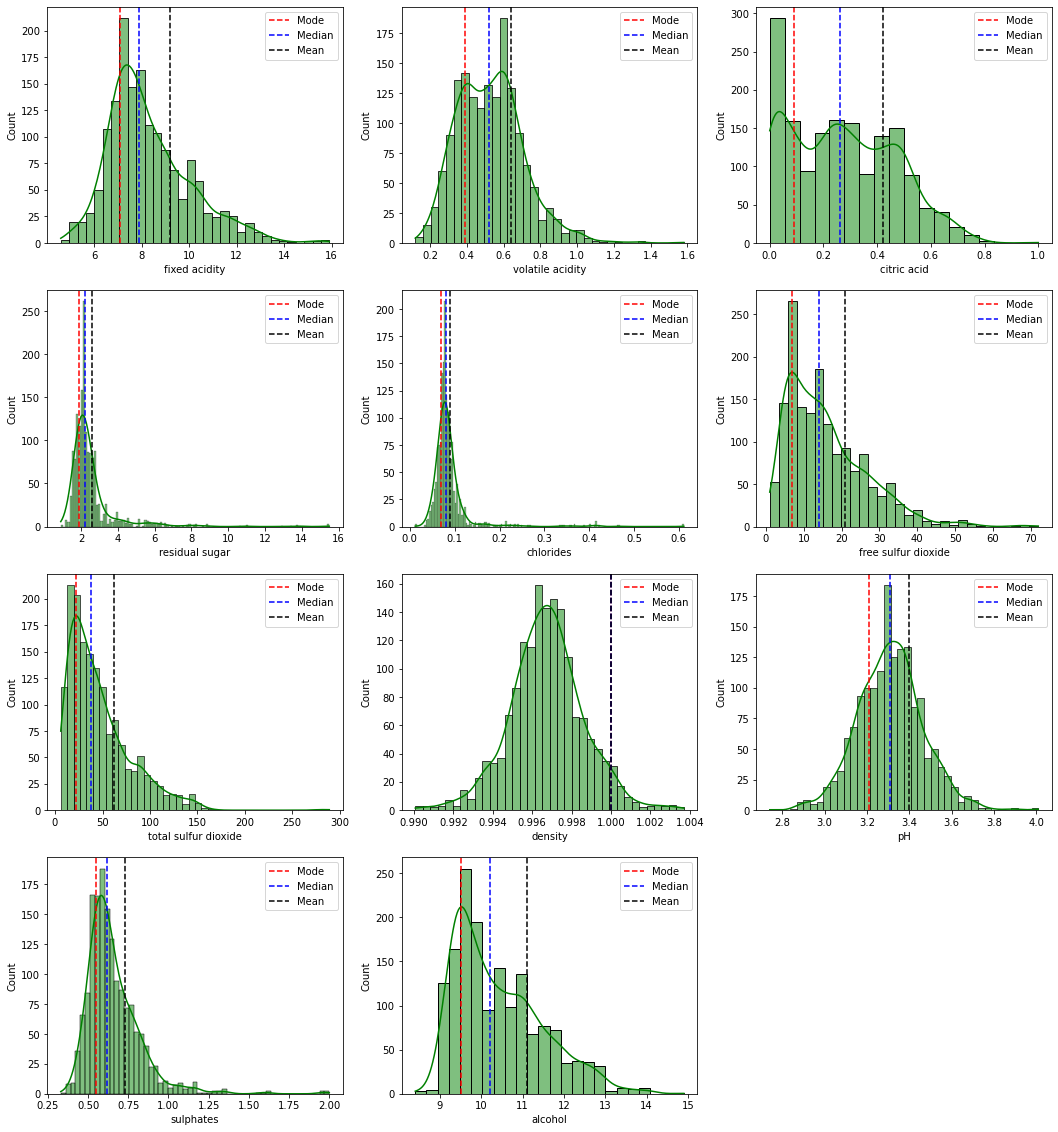

In [10]:
render_counterplot()

In [11]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

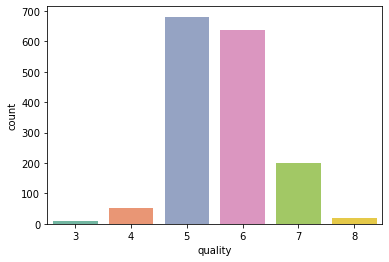

In [12]:
sns.countplot(x = 'quality', data = df, palette = 'Set2')

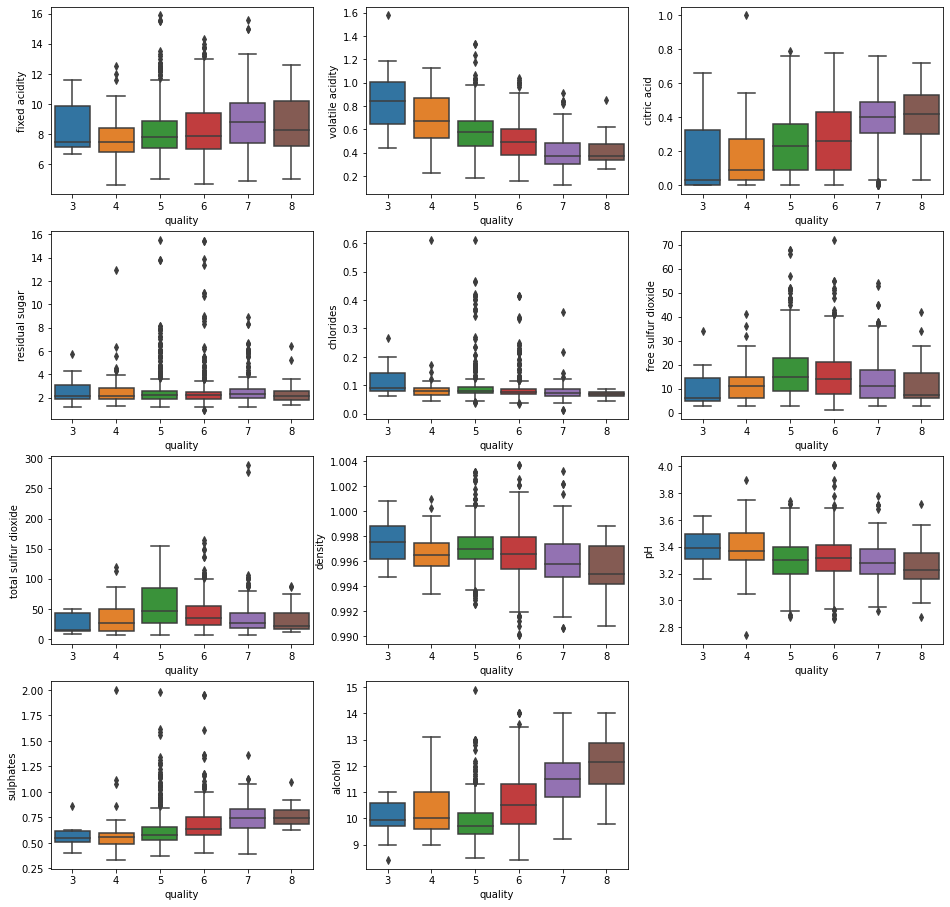

In [13]:
## Checking For Outliners in the dataset
features_1 = df.columns[:-1]
fig = plt.figure(figsize = (16,20))
for column, feature in enumerate(features_1):
    fig.add_subplot(5,3,column+1)
    sns.boxplot(x = 'quality', y = feature, data = df)

In [14]:
df.columns.value_counts().sum()

12

In [15]:
x = df.drop('quality', axis = 1)
y = df['quality'] 
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [16]:
## Standardization of the dataset
scaler = StandardScaler()
x[x.columns] = scaler.fit_transform(x[x.columns])

In [17]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


<AxesSubplot:>

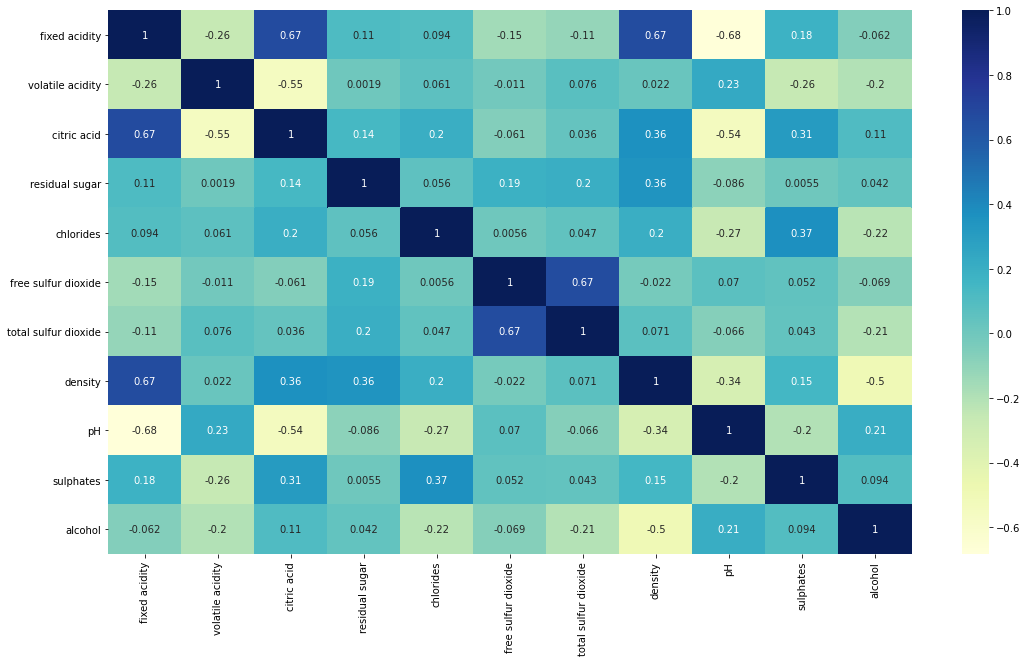

In [43]:
## Finding Correlations
plt.figure(figsize=(18,10))
sns.heatmap(x.corr(),cmap="YlGnBu",annot=True)

## Handling Imbalanced Dataset

In [19]:
from imblearn.over_sampling import SMOTE

In [20]:
smote = SMOTE()
x_sm, y_sm = smote.fit_resample(x,y)

In [21]:
y_sm.value_counts()

4    681
6    681
8    681
3    681
5    681
7    681
Name: quality, dtype: int64

In [22]:
## Before runnng the model we need to split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.2, random_state=42)

In [23]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import Dropout

In [24]:
model = Sequential()
model.add(tensorflow.keras.layers.Input(shape=11,))
model.add(tensorflow.keras.layers.Dense(32, activation='relu'))
model.add(tensorflow.keras.layers.Dense(64, activation='relu'))
model.add(tensorflow.keras.layers.Dropout(0.3))
model.add(tensorflow.keras.layers.Dense(128, activation='relu'))
model.add(tensorflow.keras.layers.Dense(6, activation='softmax'))

In [25]:
y_train

2185    3
2462    4
2819    4
1769    3
1373    5
       ..
1130    6
1294    6
860     5
3507    8
3174    7
Name: quality, Length: 3268, dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [27]:
y_test

array([3, 2, 4, 4, 1, 1, 2, 3, 2, 3, 5, 4, 2, 0, 5, 3, 2, 2, 5, 1, 3, 0,
       2, 3, 1, 0, 3, 0, 2, 5, 2, 0, 5, 3, 0, 3, 2, 5, 2, 4, 5, 5, 3, 4,
       4, 2, 4, 2, 1, 5, 3, 3, 2, 3, 3, 0, 1, 4, 1, 3, 3, 1, 3, 0, 5, 1,
       0, 4, 4, 3, 1, 0, 2, 4, 1, 2, 1, 1, 4, 0, 5, 3, 2, 3, 3, 5, 5, 2,
       5, 1, 0, 3, 3, 2, 3, 3, 3, 4, 5, 5, 1, 5, 2, 2, 3, 1, 3, 0, 4, 4,
       3, 1, 4, 3, 2, 3, 0, 5, 1, 2, 2, 2, 3, 2, 3, 4, 2, 4, 2, 0, 4, 4,
       2, 0, 1, 0, 5, 2, 3, 0, 4, 2, 3, 3, 4, 5, 4, 3, 5, 1, 1, 2, 1, 2,
       1, 1, 0, 5, 4, 5, 1, 0, 5, 3, 4, 0, 5, 3, 1, 1, 1, 5, 1, 1, 5, 3,
       3, 0, 3, 1, 1, 2, 5, 5, 4, 4, 2, 4, 2, 4, 2, 3, 2, 4, 3, 1, 1, 0,
       1, 5, 4, 5, 0, 1, 0, 4, 1, 2, 1, 3, 5, 4, 2, 3, 5, 4, 1, 2, 4, 0,
       2, 0, 5, 5, 4, 0, 2, 0, 3, 5, 4, 1, 5, 1, 2, 3, 5, 4, 1, 1, 4, 5,
       0, 1, 3, 3, 1, 2, 3, 4, 1, 3, 3, 5, 1, 4, 2, 1, 2, 2, 1, 4, 0, 3,
       3, 0, 4, 4, 5, 0, 4, 1, 3, 3, 0, 3, 3, 3, 0, 5, 2, 5, 2, 3, 2, 2,
       0, 1, 1, 5, 5, 0, 1, 2, 4, 0, 0, 2, 4, 1, 3,

In [28]:
y_train = pd.DataFrame(y_train.reshape(len(y_train),1))
y_tets = pd.DataFrame(y_test.reshape(len(y_test),1))

In [29]:
y_train

,0
0,0
1,1
2,1
3,0
4,2
...,...
3263,3
3264,3
3265,2
3266,5


In [30]:
y_train = tensorflow.keras.utils.to_categorical(y_train,6)
y_test = tensorflow.keras.utils.to_categorical(y_test,6)

In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
model.fit(x_train,y_train,epochs=400,verbose=1)

Epoch 1/400
103/103 [==============================] - 0s 1ms/step - loss: 1.4372 - accuracy: 0.4042
Epoch 2/400
103/103 [==============================] - 0s 1ms/step - loss: 1.0763 - accuracy: 0.5539
Epoch 3/400
103/103 [==============================] - 0s 950us/step - loss: 0.9535 - accuracy: 0.6108
Epoch 4/400
103/103 [==============================] - 0s 1ms/step - loss: 0.8821 - accuracy: 0.6502
Epoch 5/400
103/103 [==============================] - 0s 1ms/step - loss: 0.8224 - accuracy: 0.6686
Epoch 6/400
103/103 [==============================] - 0s 1ms/step - loss: 0.7843 - accuracy: 0.6864
Epoch 7/400
103/103 [==============================] - 0s 1ms/step - loss: 0.7498 - accuracy: 0.7029
Epoch 8/400
103/103 [==============================] - 0s 1ms/step - loss: 0.7150 - accuracy: 0.7237
Epoch 9/400
103/103 [==============================] - 0s 1ms/step - loss: 0.6993 - accuracy: 0.7218
Epoch 10/400
103/103 [==============================] - 0s 985us/step - loss: 0.6893 - ac

In [33]:
y_train

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

## prediction

In [34]:
y_pred = model.predict(x_test)

26/26 [==============================] - 0s 905us/step


In [35]:
y_pred

array([[1.55564523e-16, 9.08511657e-17, 7.35974133e-01, 2.64021218e-01,
        4.67421341e-06, 4.78341244e-17],
       [2.19557156e-23, 4.75626457e-26, 9.59160179e-02, 9.04083967e-01,
        1.52627445e-22, 9.76821215e-23],
       [3.45393478e-25, 2.11805856e-26, 1.01394166e-04, 2.21707067e-03,
        9.97681499e-01, 1.70793741e-14],
       ...,
       [1.00000000e+00, 2.60199106e-28, 8.16138712e-09, 3.64615109e-12,
        3.41751803e-33, 0.00000000e+00],
       [1.40839795e-04, 9.34143007e-01, 5.08389212e-02, 1.48772225e-02,
        3.32194675e-15, 2.36068248e-11],
       [2.01668329e-18, 9.12215775e-15, 9.95328069e-01, 4.67095384e-03,
        1.99889333e-16, 1.00804539e-06]], dtype=float32)

In [36]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([2, 3, 4, 4, 1, 1, 2, 3, 2, 2, 5, 4, 2, 0, 5, 2, 2, 2, 5, 1, 3, 0,
       2, 2, 1, 0, 3, 0, 3, 5, 2, 0, 5, 3, 0, 3, 2, 5, 2, 4, 5, 5, 2, 4,
       4, 1, 4, 1, 1, 5, 2, 3, 2, 3, 4, 0, 1, 4, 1, 3, 3, 1, 3, 0, 5, 1,
       0, 4, 4, 3, 1, 0, 1, 4, 1, 2, 1, 1, 4, 0, 5, 3, 3, 3, 2, 5, 5, 2,
       5, 2, 0, 3, 3, 2, 1, 4, 2, 4, 5, 5, 1, 5, 2, 2, 2, 1, 3, 0, 4, 4,
       2, 1, 4, 2, 2, 2, 0, 5, 1, 2, 2, 3, 4, 2, 3, 3, 2, 4, 2, 0, 4, 2,
       2, 0, 1, 0, 5, 3, 2, 0, 3, 2, 2, 3, 4, 4, 4, 3, 5, 1, 1, 2, 1, 2,
       1, 1, 0, 5, 4, 5, 1, 0, 5, 3, 4, 0, 5, 3, 1, 1, 1, 5, 1, 1, 5, 4,
       1, 0, 2, 1, 1, 3, 5, 5, 4, 4, 3, 4, 3, 4, 4, 3, 2, 2, 2, 1, 1, 0,
       1, 5, 4, 5, 0, 1, 0, 4, 1, 2, 1, 3, 5, 4, 3, 2, 5, 4, 1, 2, 4, 0,
       2, 0, 5, 5, 4, 0, 2, 0, 3, 5, 4, 1, 5, 1, 3, 3, 5, 4, 1, 1, 4, 5,
       0, 1, 2, 3, 1, 3, 3, 4, 1, 3, 3, 5, 1, 4, 2, 1, 2, 2, 1, 4, 0, 3,
       3, 0, 4, 4, 5, 0, 4, 1, 3, 3, 0, 3, 3, 2, 0, 5, 2, 5, 2, 3, 2, 2,
       0, 1, 1, 5, 5, 0, 1, 2, 4, 0, 0, 2, 4, 1, 2,

In [37]:
 y_test

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [38]:
y_test = np.argmax(y_test, axis=1)
y_test

array([3, 2, 4, 4, 1, 1, 2, 3, 2, 3, 5, 4, 2, 0, 5, 3, 2, 2, 5, 1, 3, 0,
       2, 3, 1, 0, 3, 0, 2, 5, 2, 0, 5, 3, 0, 3, 2, 5, 2, 4, 5, 5, 3, 4,
       4, 2, 4, 2, 1, 5, 3, 3, 2, 3, 3, 0, 1, 4, 1, 3, 3, 1, 3, 0, 5, 1,
       0, 4, 4, 3, 1, 0, 2, 4, 1, 2, 1, 1, 4, 0, 5, 3, 2, 3, 3, 5, 5, 2,
       5, 1, 0, 3, 3, 2, 3, 3, 3, 4, 5, 5, 1, 5, 2, 2, 3, 1, 3, 0, 4, 4,
       3, 1, 4, 3, 2, 3, 0, 5, 1, 2, 2, 2, 3, 2, 3, 4, 2, 4, 2, 0, 4, 4,
       2, 0, 1, 0, 5, 2, 3, 0, 4, 2, 3, 3, 4, 5, 4, 3, 5, 1, 1, 2, 1, 2,
       1, 1, 0, 5, 4, 5, 1, 0, 5, 3, 4, 0, 5, 3, 1, 1, 1, 5, 1, 1, 5, 3,
       3, 0, 3, 1, 1, 2, 5, 5, 4, 4, 2, 4, 2, 4, 2, 3, 2, 4, 3, 1, 1, 0,
       1, 5, 4, 5, 0, 1, 0, 4, 1, 2, 1, 3, 5, 4, 2, 3, 5, 4, 1, 2, 4, 0,
       2, 0, 5, 5, 4, 0, 2, 0, 3, 5, 4, 1, 5, 1, 2, 3, 5, 4, 1, 1, 4, 5,
       0, 1, 3, 3, 1, 2, 3, 4, 1, 3, 3, 5, 1, 4, 2, 1, 2, 2, 1, 4, 0, 3,
       3, 0, 4, 4, 5, 0, 4, 1, 3, 3, 0, 3, 3, 3, 0, 5, 2, 5, 2, 3, 2, 2,
       0, 1, 1, 5, 5, 0, 1, 2, 4, 0, 0, 2, 4, 1, 3,

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.8618581907090465

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       136
           1       0.98      0.91      0.94       140
           2       0.73      0.71      0.72       156
           3       0.59      0.75      0.66       122
           4       0.95      0.87      0.91       127
           5       0.99      0.97      0.98       137

    accuracy                           0.86       818
   macro avg       0.87      0.86      0.87       818
weighted avg       0.88      0.86      0.87       818

